# Exercise 1.2
> Go to http://freesound.org and download a sound samplethat includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Computeand plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

> Use `high_pass`, `low_pass`, and `band_stop` to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

## Acquiring the Sound

In [28]:
from thinkdsp import read_wave

wave = read_wave('Sounds/557274__johnnie-holiday__dark-ambience_cut.wav')

For some reason, this sound had 3 channels and so `read_wave()` failed to load it. I fixed it via Audacity (and I cut the half-second segment right there as well).

In [29]:
wave.make_audio()

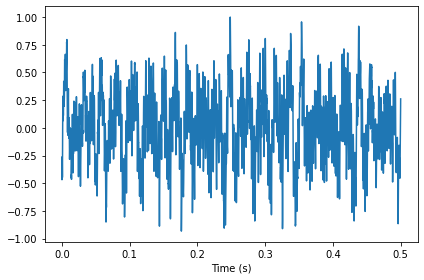

In [32]:
from thinkdsp import decorate

# segment = wave.segment(0.498, 0.500)
segment = wave.segment(0, wave.duration)

segment.plot()
decorate(xlabel='Time (s)')

In [6]:
segment.make_audio()

## Acquiring the Spectrum

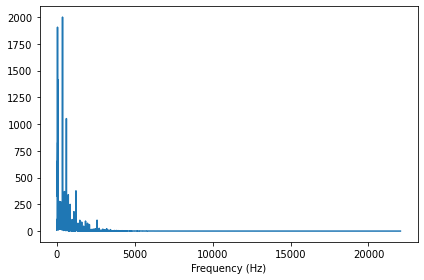

In [33]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

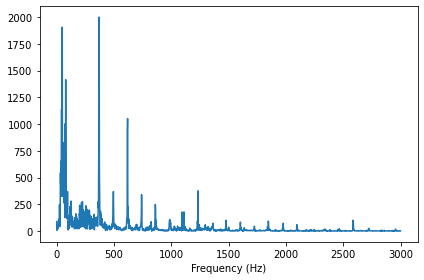

In [34]:
spectrum.plot(high=3000)
decorate(xlabel='Frequency (Hz)')

The more frequencies the sound containts, the richer the timbre of that sound.

The first time, I took a sound named `445999__breviceps__fart-2` and it's spectrum was nearly a complete noise. After an attempt to filter it a bit, I got nearly a silence. This means, that fart sound is the noise itself and therefore is a very rich sound by the definition above. 

## Filtering

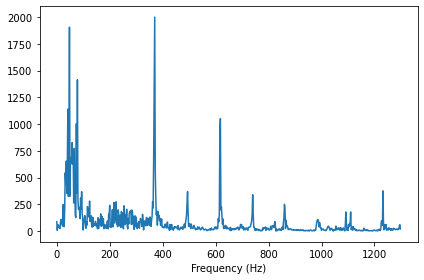

In [35]:
spectrum.low_pass(1300)
spectrum.plot(high=1300)
decorate(xlabel='Frequency (Hz)')

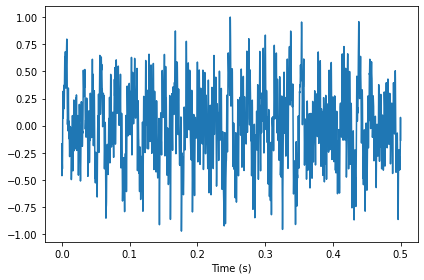

In [36]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.plot()
decorate(xlabel='Time (s)')

For comparison:

In [38]:
segment.make_audio()

In [37]:
filtered.make_audio()

It sounds like there's some wall between us and the source.

# Exercise 1.3
> Synthesize a compound signal by creating `SinSignal` and `CosSignal` objects and adding them up. Evaluate the signal to get a Wave, and listen to it. Compute its Spectrum and plot it. What happens if you add frequency components that are not multiples of the fundamental?

## Multiples

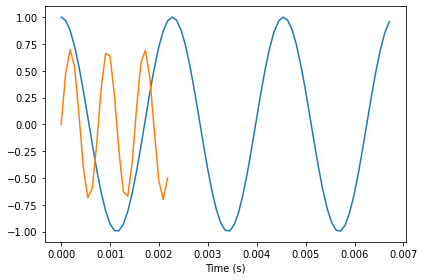

In [43]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=440,     amp=1.0, offset=0)
sin_sig = SinSignal(freq=440 * 3, amp=0.7, offset=0)

cos_sig.plot()
decorate(xlabel='Time (s)')

sin_sig.plot()
decorate(xlabel='Time (s)')

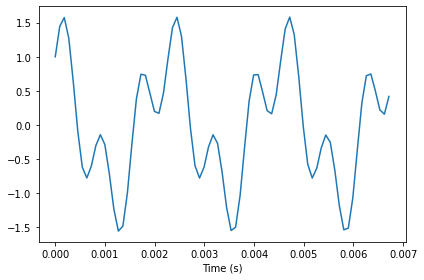

In [44]:
mix = sin_sig + cos_sig
mix.plot()
decorate(xlabel='Time (s)')

In [45]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave.make_audio()

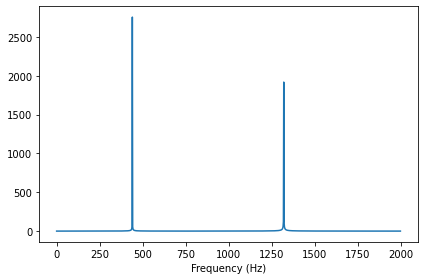

In [48]:
spectrum = wave.make_spectrum()
spectrum.plot(high=2000)
decorate(xlabel='Frequency (Hz)')

## Adding a non-Multiple

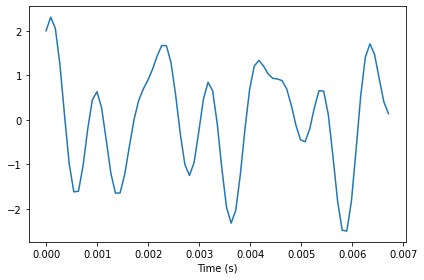

In [82]:
one_more_cos_sig = CosSignal(freq=440 * 2.1315, amp=1.0, offset=0)
one_more_mix = mix + one_more_cos_sig
one_more_mix.plot()
decorate(xlabel='Time (s)')

In [55]:
one_more_wave = one_more_mix.make_wave(duration=0.5, start=0, framerate=11025)
one_more_wave.make_audio()

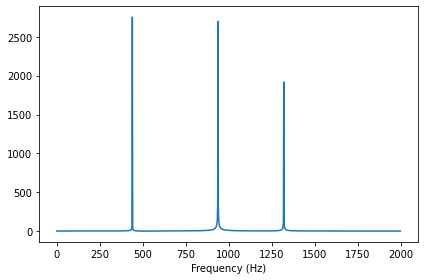

In [56]:
one_more_spectrum = one_more_wave.make_spectrum()
one_more_spectrum.plot(high=2000)
decorate(xlabel='Frequency (Hz)')

Now it sounds like some spaceship error signal.

## Procedural Generation

In [83]:
def generate_compound(components_count, get_next_frequency):
    mix = CosSignal(freq=get_next_frequency(0), amp=1.0, offset=0)
    
    for it in range(2, components_count, 2):
        frequency = get_next_frequency(it)
        mix += CosSignal(freq=frequency, amp=1.0/(it + 1)**2, offset=0)
        
    for it in range(1, components_count, 2):
        frequency = get_next_frequency(it)
        mix += SinSignal(freq=frequency, amp=1.0/(it + 1)**2, offset=0)
    
    return mix.make_wave(duration=0.5, start=0, framerate=11025)

In [84]:
import random

wave_multiples = generate_compound(10, lambda it: 440 * (it + 1))
wave_non_multiples = generate_compound(10, lambda it: 440 * random.uniform(1, 5))

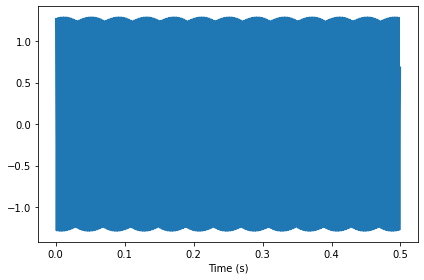

In [85]:
wave_multiples.plot()
decorate(xlabel='Time (s)')

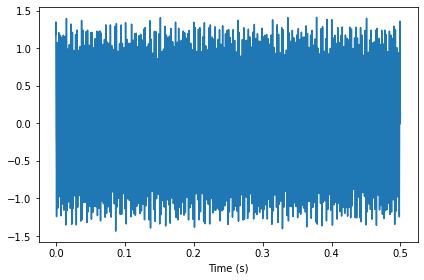

In [86]:
wave_non_multiples.plot()
decorate(xlabel='Time (s)')

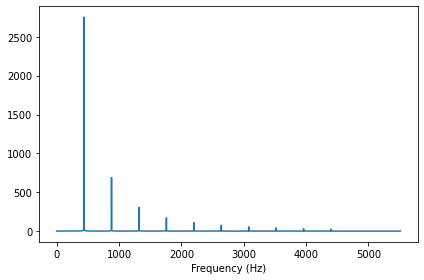

In [87]:
spectrum_multiples = wave_multiples.make_spectrum()
spectrum_multiples.plot()
decorate(xlabel='Frequency (Hz)')

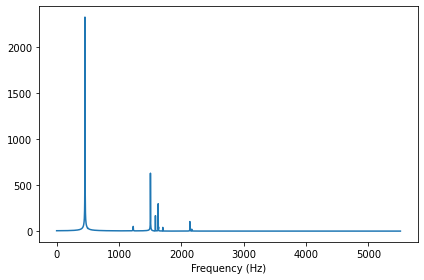

In [88]:
spectrum_non_multiples = wave_non_multiples.make_spectrum()
spectrum_non_multiples.plot()
decorate(xlabel='Frequency (Hz)')

In [89]:
wave_multiples.make_audio()

In [90]:
wave_non_multiples.make_audio()

# Exercise 1.3
> Write a function called `stretch` that takes a `Wave` and a stretch factor and speeds up or slows down the wave by modifying ts and framerate. Hint: it should only take two lines of code

In [97]:
def stretch(wave, stretch_factor):
    wave.framerate *= stretch_factor
    
stretch(wave_non_multiples, 1)
wave_non_multiples.make_audio()